# Релизуйте свой классификатор KNN

### Импорты

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [97]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbours = n_neighbours
    self.weights = weights
    self.metric = metric

    self.X_train = None
    self.y_train  = None


  def euclidean_distant(self, Point_1, Point_2) -> float:
    return ((Point_1[0]-Point_2[0])**2 + (Point_1[1]-Point_2[1])**2)**0.5

  def manhattan_distant(self, Point_1, Point_2) -> float:
    return abs(Point_1[0]-Point_2[0]) + abs(Point_1[1]-Point_2[1])


  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.X_train = X
    self.y_train = y

  def predict(self, X: np.ndarray) -> np.ndarray:
    y = []
    for Point_i in X:
      dist = []
      for Point_j in self.X_train:
        if self.metric == "euclidean":
          dist.append(self.euclidean_distant(Point_i, Point_j))
        elif self.metric == "manhattan":
          dist.append(self.manhattan_distant(Point_i, Point_j))
      counter = 0
      data = []
      
      while counter < self.n_neighbours:
        ind = dist.index(min(dist))
        flag = self.y_train[ind]
        dist.pop(ind)
        data.append(self.y_train[ind + counter])
        counter += 1

      flag_1 = 0
      flag_0 = 0
      for i in data:
        if i:
          flag_1 += 1
        else:
          flag_0 += 1
      if flag_0 >= flag_1:
        y.append(0)
      else:
        y.append(1)

    return(np.array(y))
      


n = 20
sasha = MyKNeighborsClassifier(1)
X, y = make_moons(n_samples=500, noise=0.29, random_state=42)
sasha.fit(X,y)
X_test, tmp = make_moons(n_samples=n, noise=0.29, random_state=4)
#print(tmp)
print(sasha.predict(X_test))

[1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1]


### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



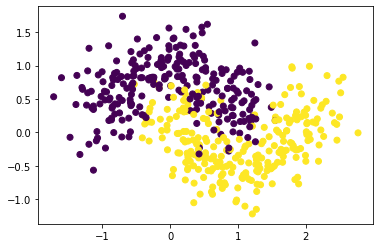

In [99]:
X, y = make_moons(n_samples=500, noise=0.29, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

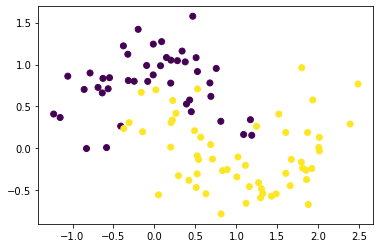

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [ ]:
### Your code goes here